# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Challenge 1

#### The data we will use in this challenge is:

In [7]:
x = np.arange(0,100)
y = x*2
z = x**2


#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

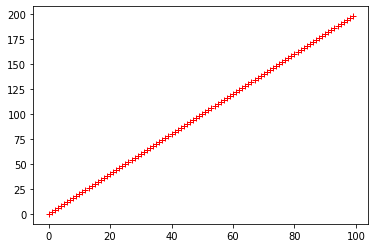

In [17]:
plt.plot(x,y, 'r+')



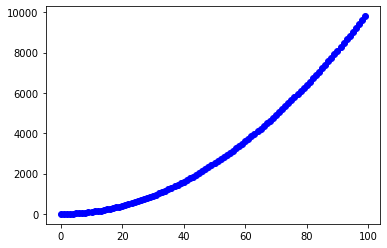

In [18]:
plt.plot(x,z, 'bo')

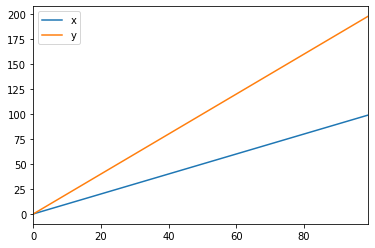

In [20]:
# Make a dataframe and then plot

df = pd.DataFrame({"x":x, "y":y})
df.plot()

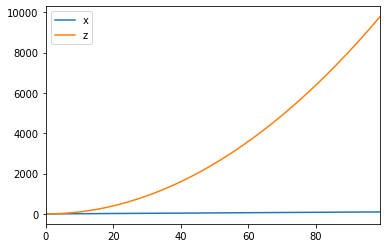

In [21]:
# Make a dataframe and then plot

df = pd.DataFrame({"x":x, "z":z})
df.plot()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

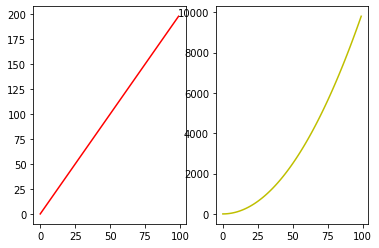

In [26]:
# Method 2
# first define figure and axis with subplots (1,2) in this case
fig,ax =plt.subplots(nrows=1, ncols=2)
# fill in two figures with specified data (object-oreinted style)
my_oo = ax[0].plot(x,y,'r')
my_oo = ax[1].plot(x,z,'y')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

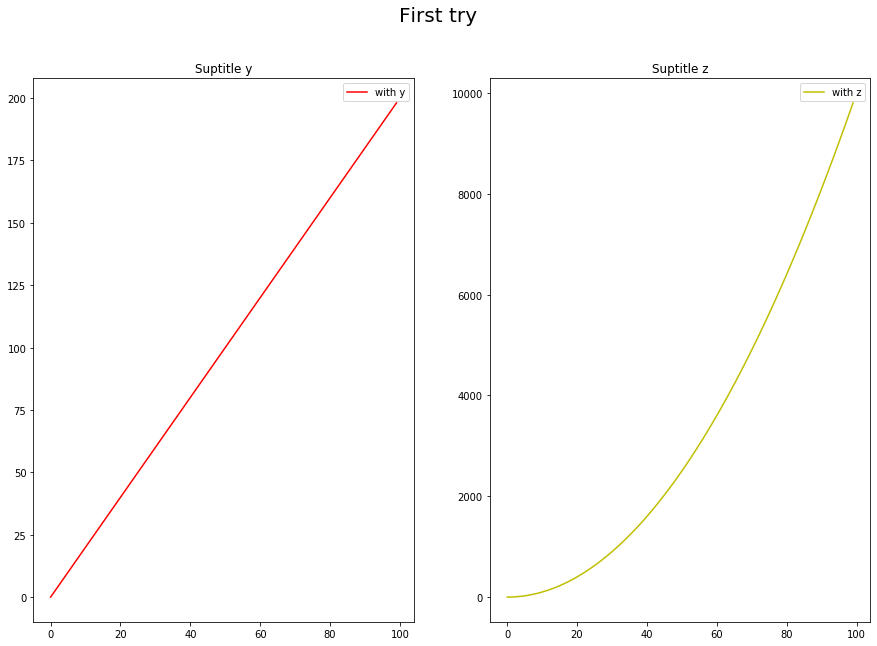

In [53]:
# adding feautures
fig,ax =plt.subplots(nrows=1, ncols=2, figsize=(15,10))
# Title and labels
fig.suptitle("First try", fontsize= 20, fontweight= 20)
ax[0].set_title("Suptitle y")
ax[1].set_title("Suptitle z")


# plot data
my_oo = ax[0].plot(x,y,'r', label= "with y")
my_oo = ax[1].plot(x,z,'y', label= "with z")

# call labels/legend
ax[0].legend()
ax[1].legend()







#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

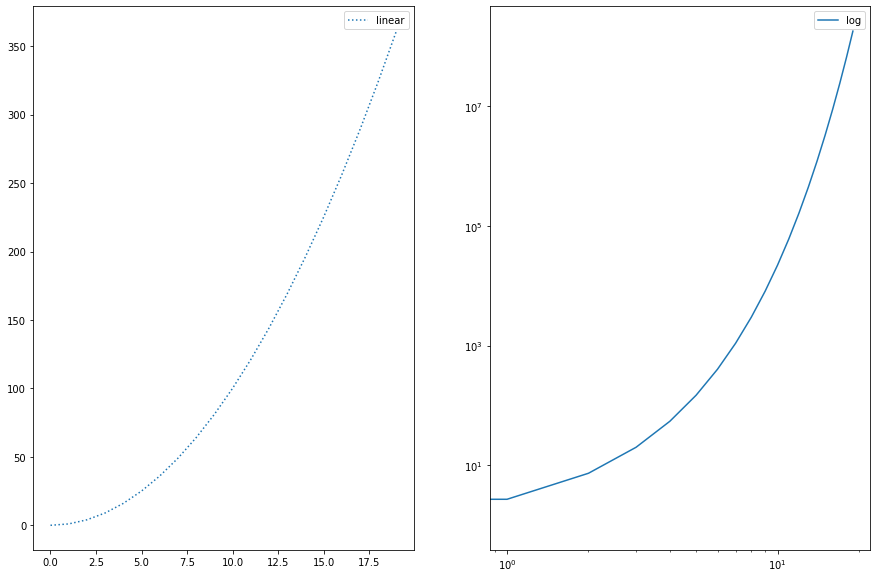

In [106]:
import math

# Create two subplots
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(15,10))

# First plot
y = x*x
ax1.plot(x,y, label='linear',linestyle =":")
ax1.set_xscale('linear')
ax1.set_yscale('linear')

# Second plot
#  with numpy instead of math.exp()
y= np.exp(x)
ax2.plot(x,y, label= "log")
ax2.set_xscale('log')
ax2.set_yscale('log')

# legend on
ax1.legend()
ax2.legend()

#### As a bonus challenge, try to add a legend to the plot.

In [107]:
# did it above, first label and call it with .legend()





## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [108]:
fitbit = pd.read_csv("C:/Users/sande/Desktop/DataClass/Fitbit2.csv")


In [111]:
fitbit.head()
#fitbit.info()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

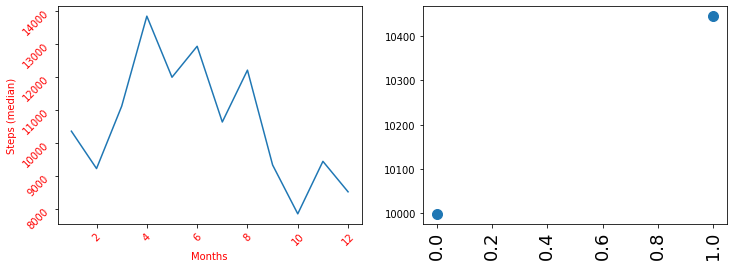

In [171]:
# MEDIAN STEPS BY MONTH_ENCODED

# Month is already encoded and in column
# Months_encoded

x1 = fitbit.groupby("Months_encoded").median()['Steps'] 
#print(x1)

# MEDIAN STEPS BY WORK_OR_WEEKEND
x2 = fitbit.groupby("Work_or_Weekend").median()['Steps']
x3 = pd.DataFrame(x2)



# Start plot, use second way because of second plot (only two 0 and 1)
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

# choose type
# fill in data
plt.sca(ax1)
plt.plot(x1)
plt.xticks(rotation=45, color='r' )
plt.yticks(rotation=45, color= 'r')
plt.xlabel("Months", color= 'r')
plt.ylabel("Steps (median)", color= 'r')

# Second plot, automaticllay a line , we dont want that
plt.sca(ax2)
# introduce linestyle=None otherwise it will connect the two outputs/points
plt.plot(x3,marker= 'o',markersize=10,  linestyle='None')
# 0 is weekend and 1 is workdays
plt.xticks( rotation=90, fontsize= 18)

# more steps in workdays

# Save figure in folder figures
fig.savefig("../figures/figure1.png")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [176]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [177]:
list_of_columns = ['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Very Active']

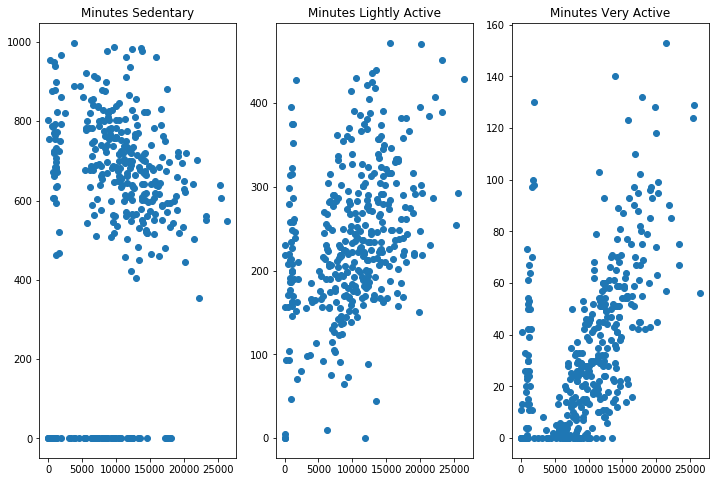

In [180]:
# your code here
# create a for loop to plot 3 differnet in scatter
# ax1.plot
# loop column names and assign to plots

# assign three plots with place
fig, ax = plt.subplots(1,3, figsize=(12,8))

for i in range(3):
    plt.sca(ax[i])
    plt.scatter(fitbit['Steps'], fitbit[list_of_columns[i]])
    plt.title(list_of_columns[i])
    
    
# fig, ax = plt.subplots(1,3, figsize=(12,8))
# for i in range(3):
#     ax[i].scatter(fitbit['Steps'], fitbit[list_of_columns[i]])
#     ax[i].set_title(list_of_columns[i])

In [172]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [293]:
titanic = pd.read_csv("C:/Users/sande/Desktop/DataClass/titanic.csv")



#### Explore the titanic dataset using Pandas dtypes.

In [183]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [185]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [189]:
# NUMERICAL VARIABLES
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
titanic.select_dtypes(include=numerics)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [191]:
# CATEGORICAL VARIABLES
categorical = ['object']
titanic.select_dtypes(include=categorical)



,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

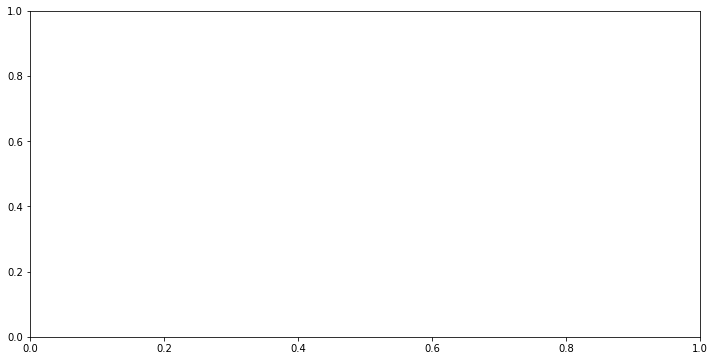

In [196]:
# your code here
# arguments plt.style, 

fig,ax = plt.subplots(1,1, figsize=(12,6))


#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

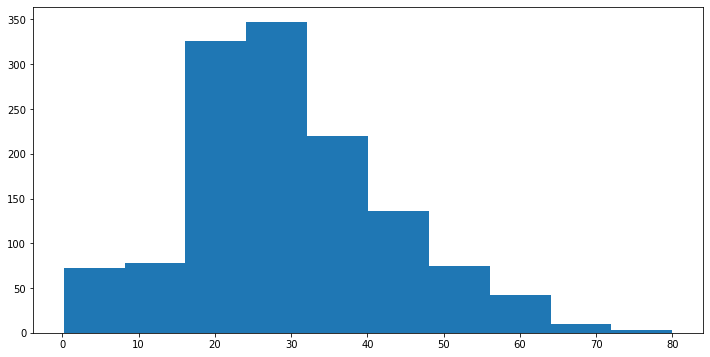

In [198]:
# your code here
# histogram
# list_of_columns =[]
# for i in range(3):
#  ax[1].hist()
#  ax[0,0].plot
#  ax[0,1].plot


fig,ax = plt.subplots(1,1, figsize=(12,6))

ax.hist(titanic['Age'])



#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [208]:
# Change string to values
bins_list= [10,20,50]

(array([162., 963.]), array([10, 20, 50]), <a list of 2 Patch objects>)

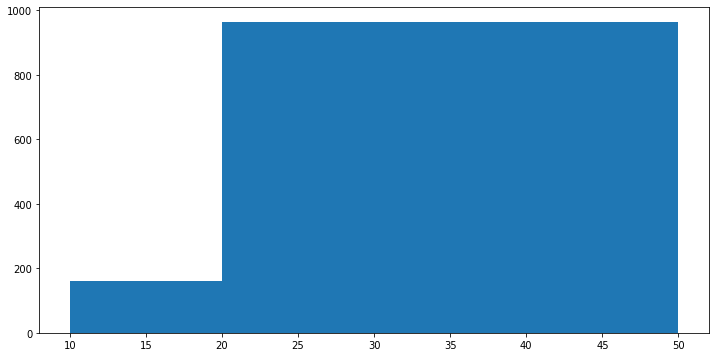

In [209]:
fig,ax = plt.subplots(1,1, figsize=(12,6))

ax.hist(titanic['Age'], bins=bins_list)

#### How does the bin size affect your plot?

In [210]:
"""
Dramatically , because now only age from 10 to 50 are taken into account
and a shift to right 
"""

'\nDramatically , because now only age from 10 to 50 are taken into account\nand a shift to right \n'

#### Use seaborn to show the distribution of column `Age`.

In [217]:
titanic.head()['Age']

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

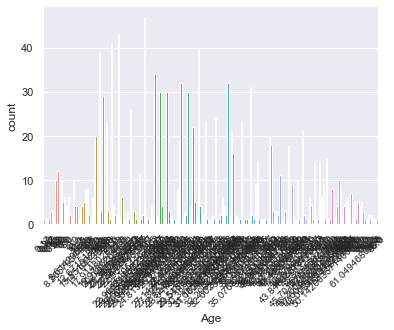

In [239]:
#fig, ax = plt.subplot(1,1, figsize= (12,6))
sb.set(style="darkgrid")
sb.countplot(x='Age' , data=titanic)

plt.xticks(rotation=45,fontsize=10)
plt.show(fig)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

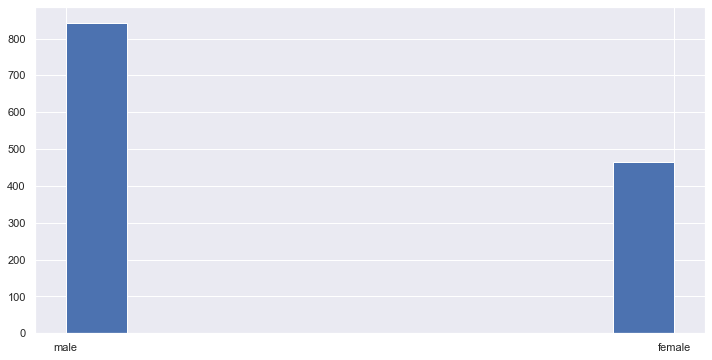

In [240]:
# Method 1 - matplotlib
# your code here
# matplotlib other one is seaborn

fig,ax = plt.subplots(1,1, figsize=(12,6))

ax.hist(titanic['Gender'])

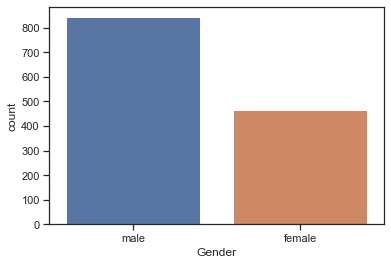

In [246]:
# Method 2 - seaborn


sb.set(style='ticks')
sb.countplot(x='Gender', data= titanic)


#### Use the right plot to visualize the column `Pclass`.

(array([323.,   0.,   0.,   0.,   0., 277.,   0.,   0.,   0., 709.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

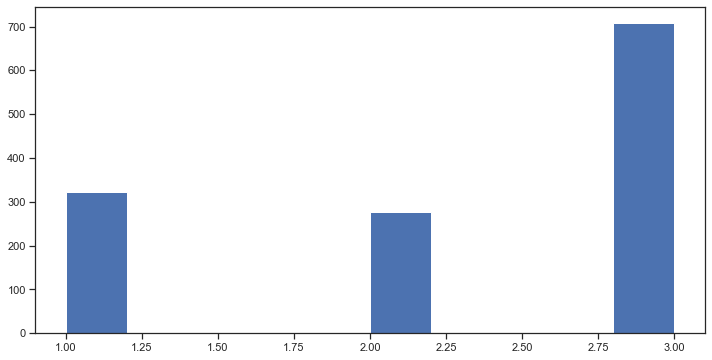

In [262]:
titanic.tail(20)['Pclass']
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.hist(titanic['Pclass'])




#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x192b0e75708>,
 'caps': [<matplotlib.lines.Line2D at 0x192b0e75d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x192b0e6be88>],
 'medians': [<matplotlib.lines.Line2D at 0x192b0e7ad08>],
 'fliers': [<matplotlib.lines.Line2D at 0x192b0e7ae08>],
 'means': []}

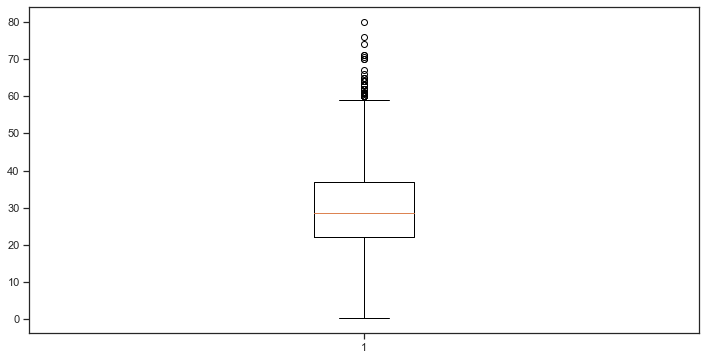

In [266]:
# one plot
fig,ax = plt.subplots(1,1, figsize=(12,6))

ax.boxplot(titanic['Age'])

In [ ]:
"""
Boxplot to see the distribution
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Mostly between 20 and 40, young group.
80 is oldest
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

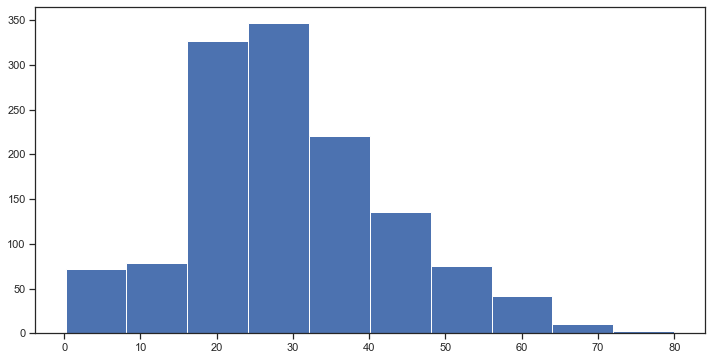

In [267]:
# histogram
fig,ax = plt.subplots(1,1, figsize=(12,6))

ax.hist(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [269]:
"""
Exact number of people with the corresponding age
"""

'\nExact number of people with the corresponding age\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

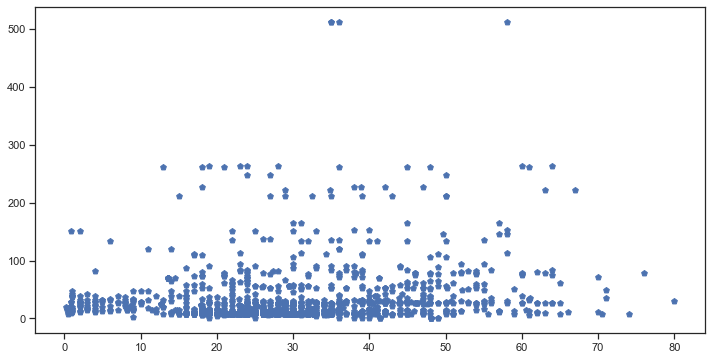

In [274]:
# Method 1 - matplotlib

fig,ax = plt.subplots(1,1, figsize=(12,6))
# scatter to show relation
ax.scatter(x= titanic['Age'], y=titanic['Fare'], marker="p" )


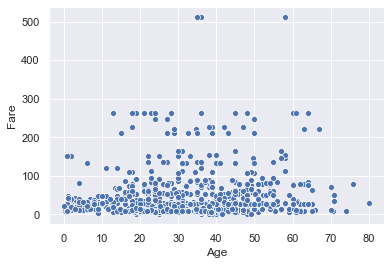

In [277]:
# Method 2 - seaborn
sb.set()
sb.scatterplot(x= "Age", y= "Fare",data=titanic)

#### Plot the correlation matrix using seaborn.

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.025325 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.065376 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.425965  0.060832  0.018322   
Age             0.025325 -0.065376 -0.425965  1.000000 -0.260706 -0.145488   
SibSp          -0.055224 -0.035322  0.060832 -0.260706  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.145488  0.373587  1.000000   
Fare            0.031128  0.257307 -0.558683  0.171355  0.160349  0.221635   

                 Fare  
PassengerId  0.031128  
Survived     0.257307  
Pclass      -0.558683  
Age          0.171355  
SibSp        0.160349  
Parch        0.221635  
Fare         1.000000  


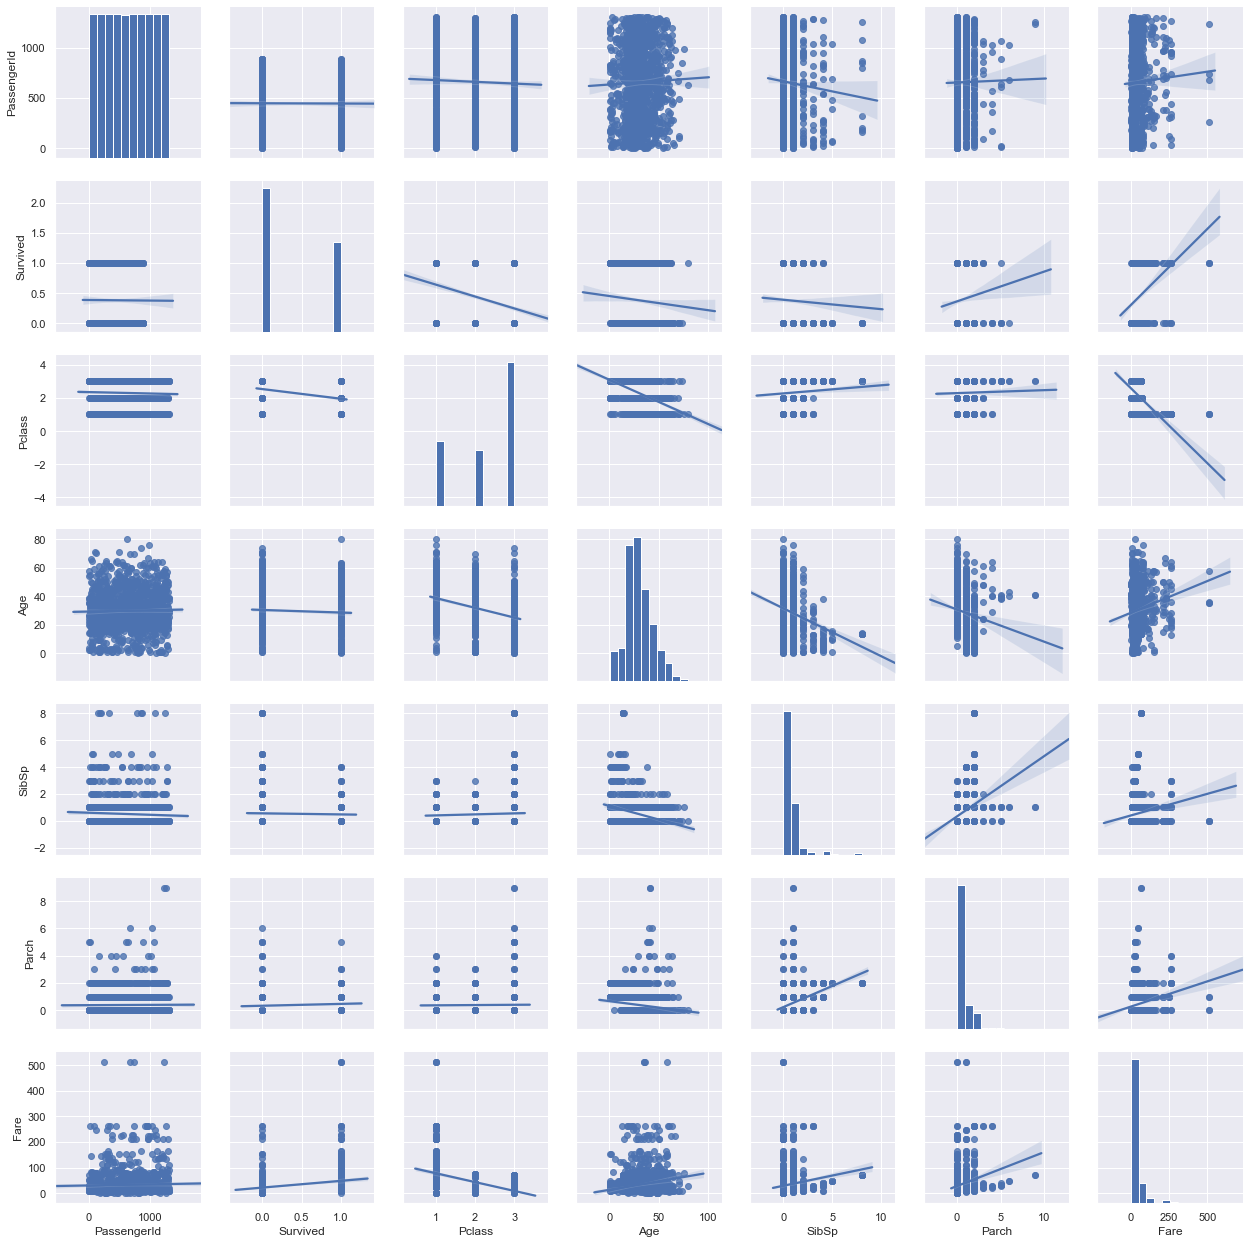

In [285]:
print(titanic.corr())

# fit linear regression models to the scatter plots
sb.pairplot(titanic, kind="reg")



#### What are the most correlated features?

In [ ]:
"""
Pclass and fare + Pclass and age
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

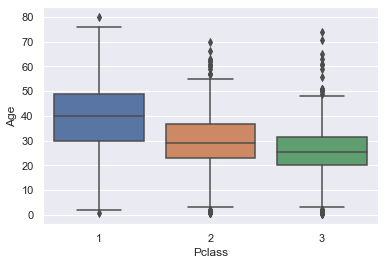

In [286]:
sb.boxplot(x='Pclass', y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

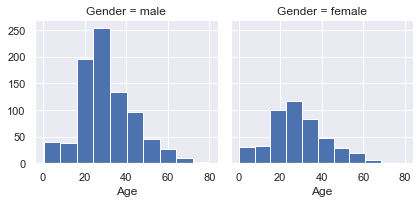

In [295]:
g = sb.FacetGrid(titanic, col= "Gender")
g.map(plt.hist,"Age")